# Importing all the libraries

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

# Importing the dataset

In [119]:
df= pd.read_csv('A:/Datasets/pwc bank task/bank-additional-full.csv',delimiter=";")
print(df.head(5))
print(df.shape)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# Exploring the data

In [120]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [121]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [122]:
for col in df.columns:
    print()
    if df[col].dtype == 'object':
        print(f'Name of Column is: {col} and unique values are: {df[col].unique()}')



Name of Column is: job and unique values are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Name of Column is: marital and unique values are: ['married' 'single' 'divorced' 'unknown']

Name of Column is: education and unique values are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Name of Column is: default and unique values are: ['no' 'unknown' 'yes']

Name of Column is: housing and unique values are: ['no' 'yes' 'unknown']

Name of Column is: loan and unique values are: ['no' 'yes' 'unknown']

Name of Column is: contact and unique values are: ['telephone' 'cellular']

Name of Column is: month and unique values are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Name of Column is: day_of_week and unique values are: ['mon' 'tue' 'wed' 'thu' 'fri']





Name of Column is: poutcome and unique valu

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


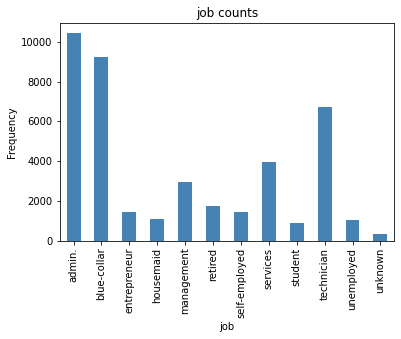

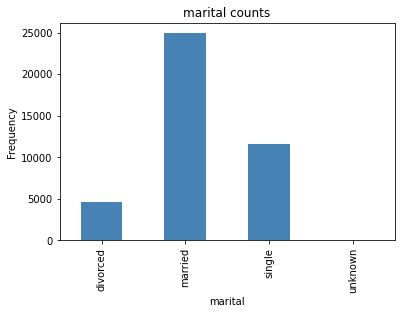

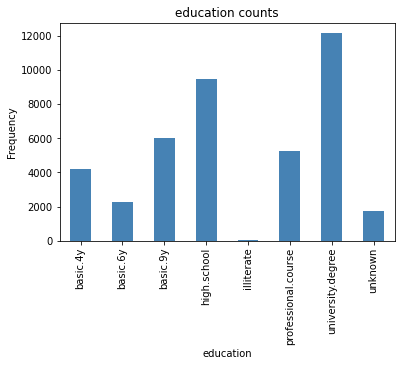

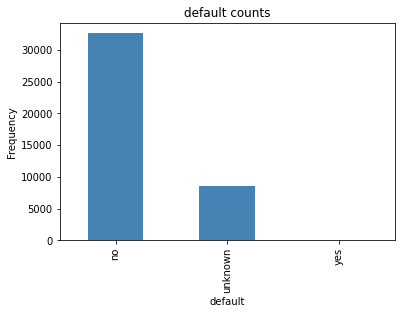

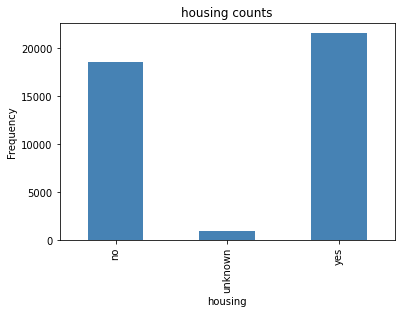

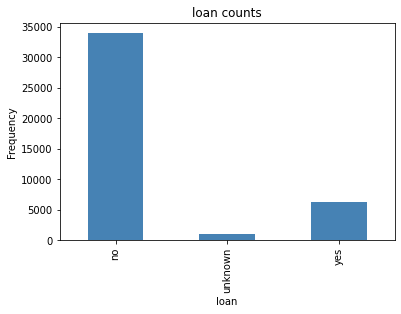

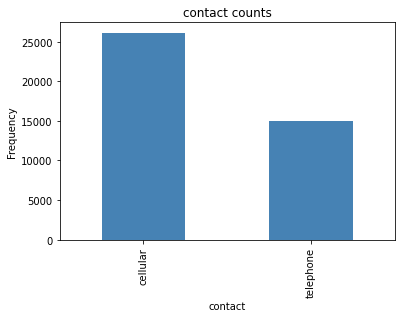

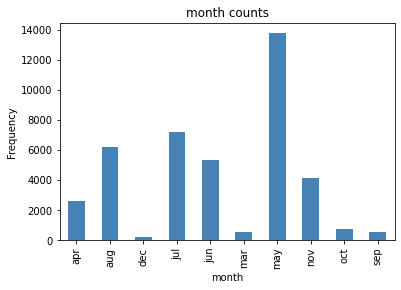

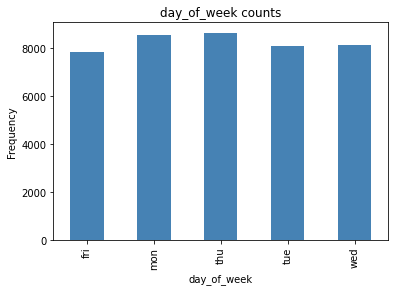

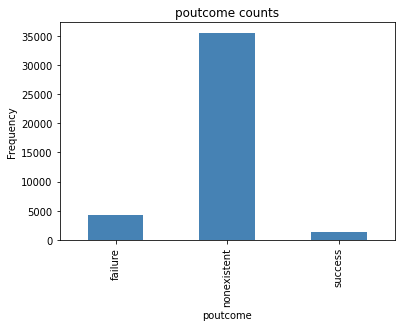

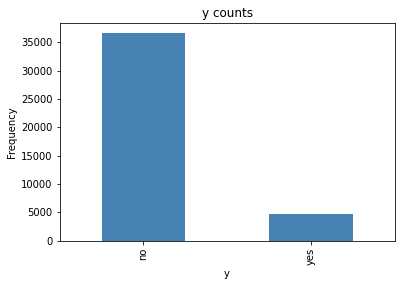

In [124]:
def return_categorical(df):
  categorical_columns = [column_name for column_name in df if df[column_name].dtype == 'O']
  print(categorical_columns)
  return categorical_columns


def return_numerical(df):
   return list(set(df.columns) - set(return_categorical(df)))
 

for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    fig = plt.figure()
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [48]:
for col in df:
    print(col,"\n",df[col].unique(),"\n","\n Count of unique values",df[col].nunique(),"\n","\n",df[col].value_counts(),"\n")

age 
 [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89] 
 
 Count of unique values 78 
 
 31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64 

job 
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 
 
 Count of unique values 12 
 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital 
 ['married' 'single' 'divorced' 'unknown'] 
 
 Count of uniqu

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(array([2.420e+02, 1.424e+03, 4.003e+03, 7.340e+03, 6.759e+03, 5.278e+03,
        4.311e+03, 3.776e+03, 3.141e+03, 2.682e+03, 1.395e+03, 2.180e+02,
        1.500e+02, 1.680e+02, 1.100e+02, 9.200e+01, 5.600e+01, 3.300e+01,
        6.000e+00, 4.000e+00]),
 array([17.  , 21.05, 25.1 , 29.15, 33.2 , 37.25, 41.3 , 45.35, 49.4 ,
        53.45, 57.5 , 61.55, 65.6 , 69.65, 73.7 , 77.75, 81.8 , 85.85,
        89.9 , 93.95, 98.  ]),
 <BarContainer object of 20 artists>)

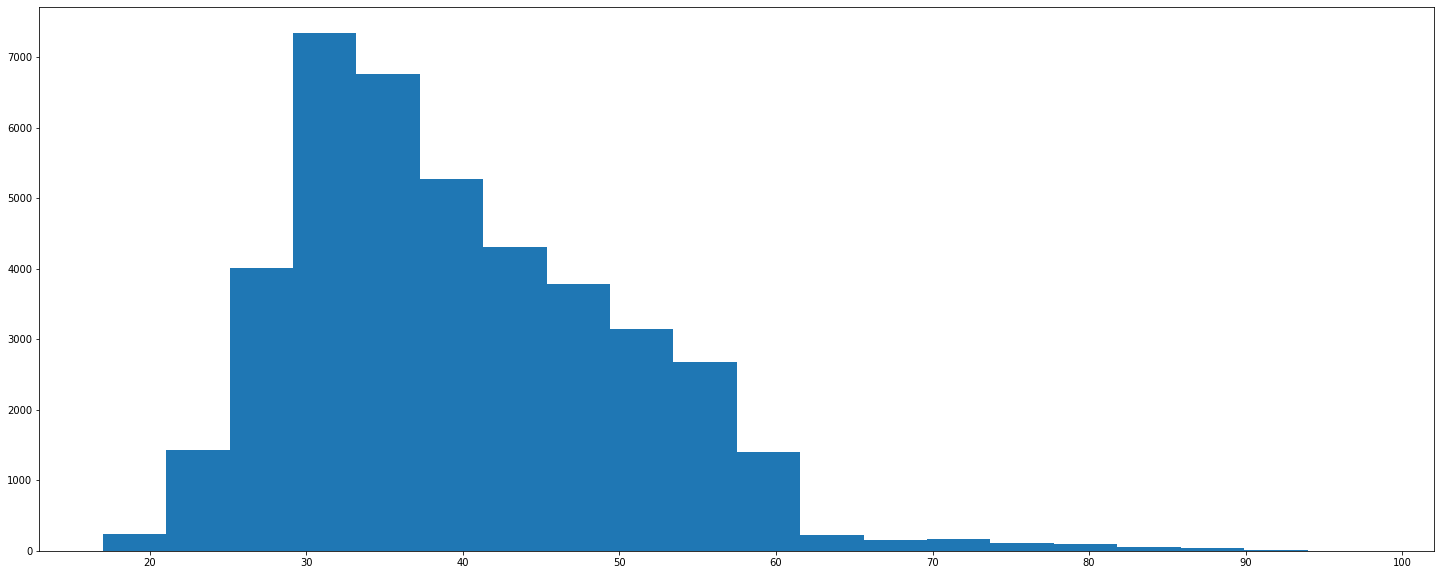

In [127]:
plt.figure(figsize=[25, 10])
plt.hist(df['age'], bins=20)

In [128]:
a=(df[df['age'] <= 60].count()['age'])
b=(df.count()['age'])
print(a,b)
print('% of people under 60 ',round((a/b)*100,2),'%')

40278 41188
% of people under 60  97.79 %


In [129]:
def check_normal(df):
  fig, axes = plt.subplots(1,len(return_numerical(df)), figsize =(70, 10))

  for i,numeric_column_name in enumerate(list(set(df.columns) -set(return_categorical(df)))):

    sns.distplot(df[numeric_column_name], ax=axes[i]);
    plt.title(f'Distribution of {numeric_column_name}');
    
def classifier(clf, x_train,x_test,y_train,y_test):
    y_test_pred = clf.predict(x_test)
    y_train_pred = clf.predict(x_train)

    accuracy_test = accuracy_score(y_test,y_test_pred)
    accuracy_train =  accuracy_score(y_train,y_train_pred)
    
    roc_test = roc_auc_score(y_test, y_test_pred, multi_class='ovr')
    roc_train = roc_auc_score(y_train, y_train_pred, multi_class='ovr')
    
    print('Train accuracy is:',accuracy_train )
    print('Test accuracy is:',accuracy_test )
    print()
    print('Train ROC is:', roc_train)
    print('Test ROC is:',roc_test )
    
    # Fscore, precision and recall on test data
    f1 = f1_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred) 
    print()
    print("F score is:",f1 )
    print("Precision is:",precision)
    print("Recall is:", recall)
  

def random_search(clf,params, x_train,x_test,y_train,y_test):
    
    random_search = RandomizedSearchCV(estimator= clf, param_distributions=params, scoring='roc_auc', cv=5)
    random_search.fit(x_train, y_train)
    optimal_model = random_search.best_estimator_

    print("Best parameters are: ", random_search.best_params_)
    print()
    print("Best estimator is: ", random_search.best_estimator_)
    print()
    print('Scores and accuracies are:')
    print()
    classifier(optimal_model, x_train,x_test,y_train,y_test)



['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


c:\python\python3.9.4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python3.9.4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python3.9.4\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

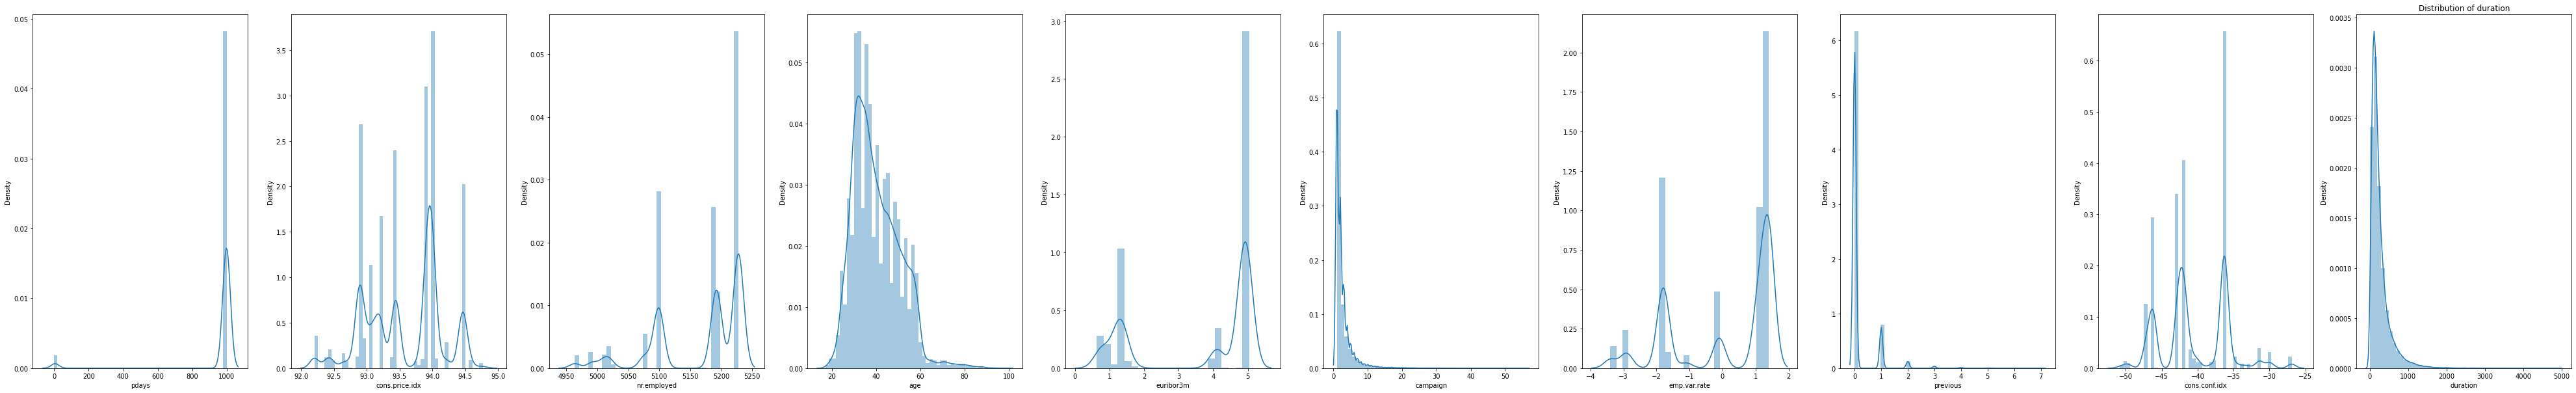

In [130]:
check_normal(df)

In [141]:
# As we can see, our data is not normally distributed

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


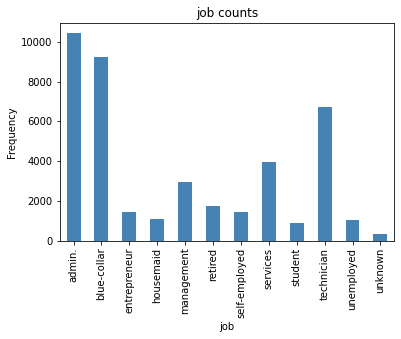

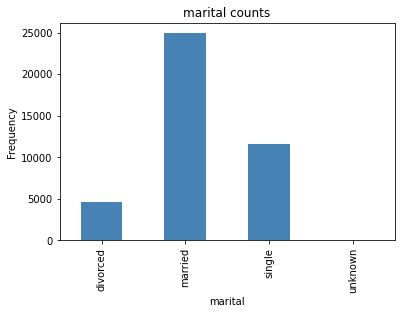

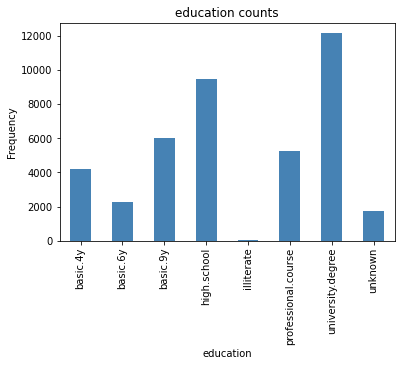

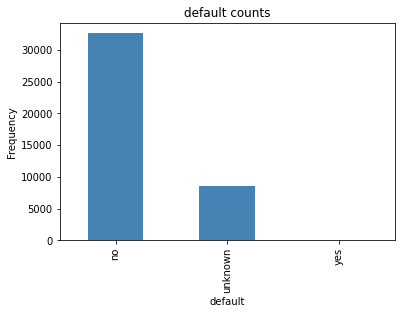

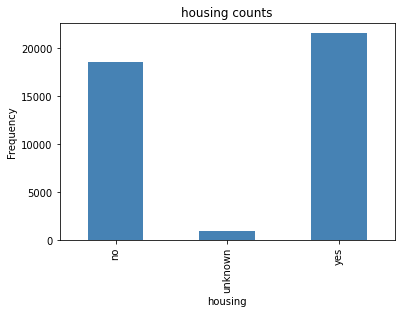

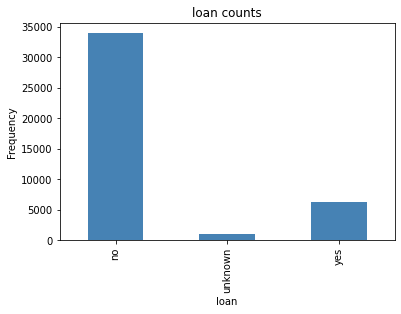

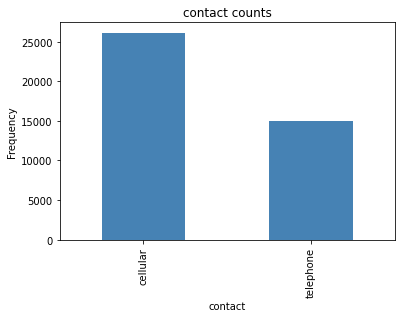

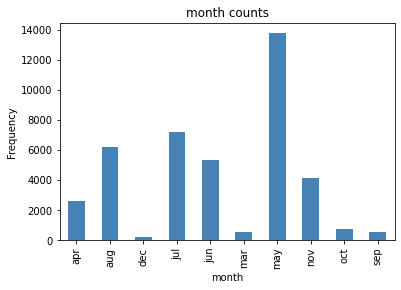

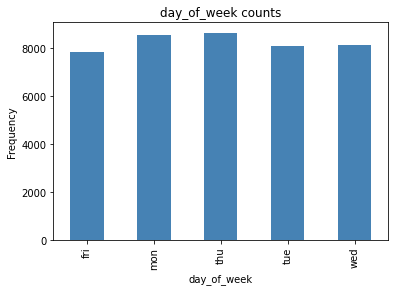

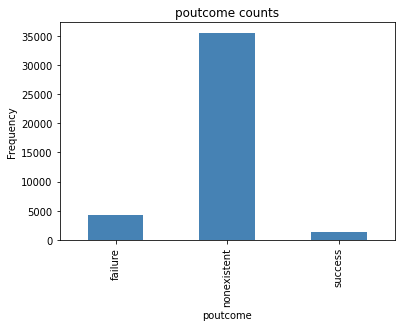

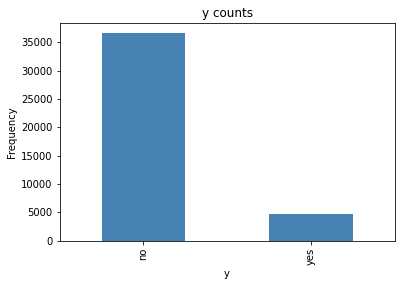

In [131]:
for col in return_categorical(df):
    counts = df[col].value_counts().sort_index()
    fig = plt.figure()
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [142]:
# We study the count of occurance of a particular value. We find that the count for the target variable is not not equally distributed

<AxesSubplot:>

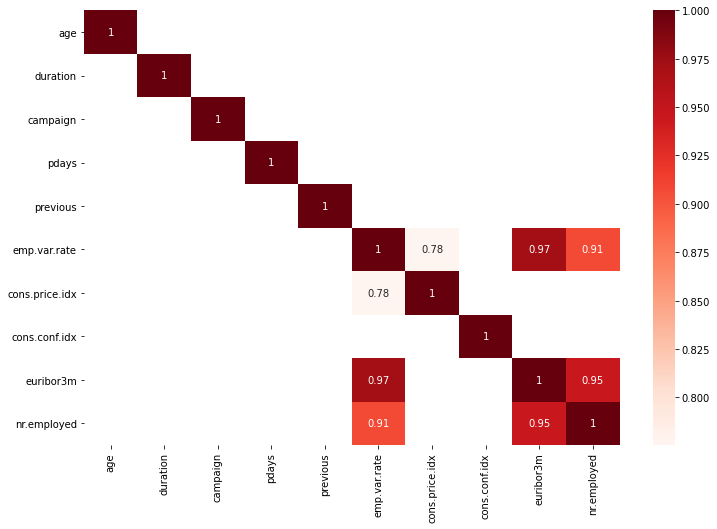

In [132]:
corr = df.corr()
corr_greater_than_70 = corr[corr>=.70]
corr_greater_than_70

plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_70, cmap="Reds", annot = True)

In [133]:
df.drop(['day_of_week', 'contact', 'month'], axis=1, inplace = True)

In [134]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   duration        41188 non-null  int64  
 8   campaign        41188 non-null  int64  
 9   pdays           41188 non-null  int64  
 10  previous        41188 non-null  int64  
 11  poutcome        41188 non-null  object 
 12  emp.var.rate    41188 non-null  float64
 13  cons.price.idx  41188 non-null  float64
 14  cons.conf.idx   41188 non-null  float64
 15  euribor3m       41188 non-null  float64
 16  nr.employed     41188 non-null  float64
 17  y               41188 non-null 

In [135]:
df  = pd.get_dummies(df, drop_first = True)

In [136]:
x = df.drop("y_yes", axis=1)
y = df['y_yes']
x.sample()

x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(x,y, random_state=42)

In [137]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', len(x_train))
print('Resampled dataset shape', len(x_smote))

Original dataset shape 30891
Resampled dataset shape 54808


# Making a model

In [138]:
s = sklearn.preprocessing.StandardScaler()

In [139]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 20)
knn.fit( s.fit_transform(x_train), y_train)

KNeighborsClassifier(n_neighbors=20)

In [140]:
classifier(knn, s.fit_transform(x_smote),s.transform(x_test), y_smote,y_test)

Train accuracy is: 0.5994562837541965
Test accuracy is: 0.8975429736816548

Train ROC is: 0.5994562837541966
Test ROC is: 0.5640991604692084

F score is: 0.22710622710622713
Precision is: 0.7311320754716981
Recall is: 0.1344319167389419


In [143]:
# This is not the best performing model, as we can see its not the best performing model. We could try other models or hypertune the parameters.

In [149]:
rforest = RandomForestClassifier(random_state=0)
classifier(rforest.fit(x_train, y_train), x_train,x_test,y_train,y_test)

Train accuracy is: 0.9999676281117478
Test accuracy is: 0.914441099349325

Train ROC is: 0.9998566102667049
Test ROC is: 0.7354340762695211

F score is: 0.5691931540342298
Precision is: 0.6524663677130045
Recall is: 0.5047701647875108


In [153]:
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(x_train, y_train)
classifier(dtree, x_train,x_test,y_train,y_test)

Train accuracy is: 1.0
Test accuracy is: 0.8922987277847917

Train ROC is: 1.0
Test ROC is: 0.7385046825239646

F score is: 0.5290870488322718
Precision is: 0.5183028286189684
Recall is: 0.5403295750216826


Feature: 0, Score: 0.10333
Feature: 1, Score: 0.35654
Feature: 2, Score: 0.03411
Feature: 3, Score: 0.02370
Feature: 4, Score: 0.00924
Feature: 5, Score: 0.00494
Feature: 6, Score: 0.01466
Feature: 7, Score: 0.02640
Feature: 8, Score: 0.09567
Feature: 9, Score: 0.15614
Feature: 10, Score: 0.00918
Feature: 11, Score: 0.00428
Feature: 12, Score: 0.00402
Feature: 13, Score: 0.00663
Feature: 14, Score: 0.00409
Feature: 15, Score: 0.00323
Feature: 16, Score: 0.00983
Feature: 17, Score: 0.00317
Feature: 18, Score: 0.01006
Feature: 19, Score: 0.00388
Feature: 20, Score: 0.00251
Feature: 21, Score: 0.00567
Feature: 22, Score: 0.01137
Feature: 23, Score: 0.00070
Feature: 24, Score: 0.00730
Feature: 25, Score: 0.00719
Feature: 26, Score: 0.00853
Feature: 27, Score: 0.00027
Feature: 28, Score: 0.00779
Feature: 29, Score: 0.01383
Feature: 30, Score: 0.00523
Feature: 31, Score: 0.00822
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00167
Feature: 34, Score: 0.01377
Feature: 35, Score: 0.00299
Fe

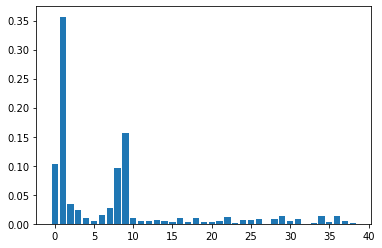

In [162]:
importance = dtree.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()